In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('insurance3r2.csv')

In [3]:
data.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [4]:
data.shape

(1338, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


In [6]:
data.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [7]:
data.isna().sum()

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [10]:
x = data.drop('insuranceclaim' , axis = 1)
y = data['insuranceclaim']
xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [11]:
xtrain

,age,sex,bmi,steps,children,smoker,region,charges
560,46,0,19.950,8005,2,0,1,9193.83850
1285,47,0,24.320,8007,0,0,0,8534.67180
1142,52,0,24.860,5008,0,0,2,27117.99378
969,39,0,34.320,3004,5,0,2,8596.82780
486,54,0,21.470,8000,3,0,1,12475.35130
...,...,...,...,...,...,...,...,...
1095,18,0,31.350,3010,4,0,0,4561.18850
1130,39,0,23.870,10000,5,0,2,8582.30230
1294,58,1,25.175,5010,0,0,0,11931.12525
860,37,0,47.600,4009,2,1,3,46113.51100


In [12]:
xtest

,age,sex,bmi,steps,children,smoker,region,charges
764,45,0,25.175,8007,2,0,0,9095.06825
887,36,0,30.020,4006,0,0,1,5272.17580
890,64,0,26.885,5005,0,1,1,29330.98315
1293,46,1,25.745,8001,3,0,1,9301.89355
259,19,1,31.920,3010,0,1,1,33750.29180
...,...,...,...,...,...,...,...,...
109,63,1,35.090,4010,0,1,2,47055.53210
575,58,0,27.170,5004,0,0,1,12222.89830
535,38,1,28.025,8000,1,0,0,6067.12675
543,54,0,47.410,4010,0,1,2,63770.42801


In [13]:
lr = LogisticRegression()
svc = SVC()
gnb = GaussianNB()
mnb = MultinomialNB()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

In [14]:
models = [lr , svc , gnb , mnb , rf , gb]


In [15]:

for i in models:
  print("***************" , i , "*************")
  i.fit(xtrain , ytrain)
  ypred = i.predict(xtest)
  print(accuracy_score(ytest , ypred))


*************** LogisticRegression() *************
0.835820895522388
*************** SVC() *************
0.6940298507462687
*************** GaussianNB() *************
0.8283582089552238
*************** MultinomialNB() *************
0.6082089552238806
*************** RandomForestClassifier() *************
0.9365671641791045
*************** GradientBoostingClassifier() *************
0.9701492537313433


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,4008,3,0,1,10600.54830,0
1334,18,0,31.920,3003,0,0,0,2205.98080,1
1335,18,0,36.850,3008,0,0,2,1629.83350,1
1336,21,0,25.800,8009,0,0,3,2007.94500,0


<Axes: xlabel='insuranceclaim', ylabel='age'>

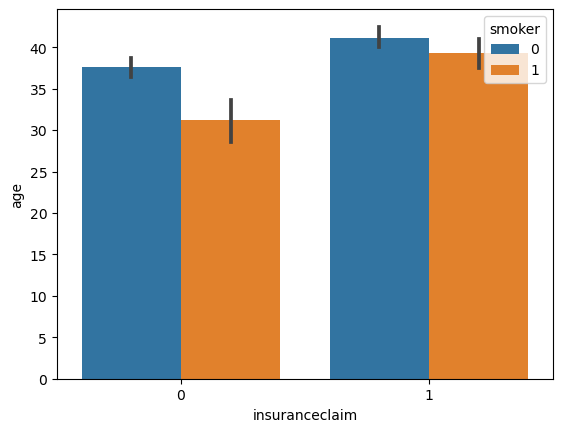

In [18]:
sns.barplot(x = data['insuranceclaim'] , y = data['age'] , hue = data['smoker'])

<Axes: xlabel='insuranceclaim', ylabel='age'>

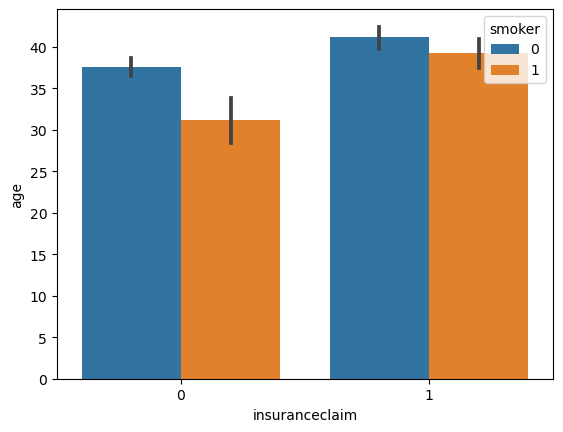

In [19]:
sns.barplot(x = data['insuranceclaim'] , y = data['age'] , hue = data['smoker'])